In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 38.9MB/s]


In [5]:
!ls

deliveries.csv	ipldata.zip  kaggle.json  matches.csv


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [8]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
data.batting_team.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)
data.bowling_team.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)

In [11]:
data2.team1.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)
data2.team2.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)

In [12]:
data2.toss_winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)
data2.winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)

In [13]:
data_f = data2.loc[data2.team1.isin(['Delhi Capitals','Sunrisers Hyderabad'])] 
data_f = data_f.loc[data_f.team2.isin(['Delhi Capitals','Sunrisers Hyderabad'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
20,21,2017,Hyderabad,2017-04-19,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,15,0,KS Williamson,"Rajiv Gandhi International Stadium, Uppal",CB Gaffaney,NJ Llong,NaN
38,39,2017,Delhi,2017-05-02,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,6,Mohammed Shami,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
393,394,2013,Delhi,2013-04-12,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,normal,0,Sunrisers Hyderabad,0,3,A Mishra,Feroz Shah Kotla,Aleem Dar,Subroto Das,NaN
427,428,2013,Hyderabad,2013-05-04,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,normal,0,Sunrisers Hyderabad,0,6,DJG Sammy,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,S Asnani,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
488,489,2014,Delhi,2014-05-10,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,1,Sunrisers Hyderabad,0,8,DW Steyn,Feroz Shah Kotla,RM Deshpande,BNJ Oxenford,NaN
530,531,2015,Visakhapatnam,2015-04-18,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,normal,0,Delhi Capitals,4,0,JP Duminy,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,PG Pathak,S Ravi,NaN
560,561,2015,Raipur,2015-05-09,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,6,0,MC Henriques,Shaheed Veer Narayan Singh International Stadium,VA Kulkarni,S Ravi,NaN
617,618,2016,Hyderabad,2016-05-12,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,7,CH Morris,"Rajiv Gandhi International Stadium, Uppal",K Bharatan,M Erasmus,NaN
627,628,2016,Raipur,2016-05-20,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,6,KK Nair,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN


**Let's do Q1 now**

SRH Wins - 9
DD Wins - 6


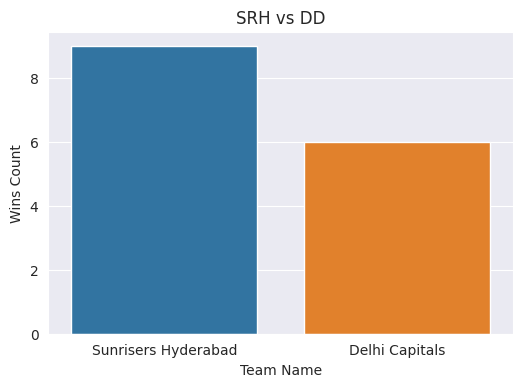

In [15]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('SRH vs DD')
A,B =data_f.winner.value_counts()

print('SRH Wins -',A)
print('DD Wins -',B)

plt.show()


Let's mark SRH considering our analysis

**Let's do Q2 now**

**Let's find balls taken by DC and SRH to score the required condition**

In [114]:
data_dc = data.loc[data.bowling_team.isin(['Sunrisers Hyderabad'])]
data_dc = data_dc.loc[data.batting_team.isin(['Delhi Capitals'])]

In [26]:
data_dc2 = data_dc.loc[data_dc.over <=4]

In [23]:
data_dc.total_runs.sum()

410

In [20]:
data_dc.match_id.nunique()

15

In [24]:
410/15

27.333333333333332

In [45]:
data_dc3 = data_dc.loc[data_dc.over <=6]

In [46]:
data_dc3.total_runs.sum()

691

In [47]:
691/15

46.06666666666667

In [49]:
data_dc4 = data_dc.loc[data_dc.over <=7]

In [51]:
data_dc4.total_runs.sum()

788

In [52]:
788/15

52.53333333333333

It's clear that DC makes 30 runs on an average on 4.2 overs and 50 runs in 6.4 overs.

The difference being - 40-26=14

In [34]:
data_srh = data.loc[data.batting_team.isin(['Sunrisers Hyderabad'])]
data_srh = data_srh.loc[data.bowling_team.isin(['Delhi Capitals'])]

In [35]:
data_srh2 = data_srh.loc[data_srh.over <=4]

In [37]:
data_srh2.total_runs.sum()

452

In [38]:
452/15

30.133333333333333

In [42]:
data_srh3 = data_srh.loc[data_srh.over <=6]

In [43]:
data_srh3.total_runs.sum()

753

In [44]:
753/15

50.2

Here it's more clear that the difference is only 2 overs i.e 12 balls.

Therefore there difference being 14-12 = 2 balls.

Let's mark 0-6 considering our analysis



**For Q3, Let's find Warner's stats on last 7 balls**

In [53]:
data_w = data.loc[data.bowling_team.isin(['Delhi Capitals'])]
data_w = data_w.loc[data.batting_team.isin(['Sunrisers Hyderabad'])]
data_w = data_w.loc[data.batsman.isin(['DA Warner'])]

In [60]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [62]:
data_w3 = data_w.groupby(['match_id','batsman','over','ball']).apply(lambda data_w:(data_w.batsman_runs.sum())).reset_index(name='Runs_Scored')
data_w3

,match_id,batsman,over,ball,Runs_Scored
0,21,DA Warner,1,1,1
1,21,DA Warner,1,4,0
2,21,DA Warner,1,5,1
3,21,DA Warner,1,7,1
4,21,DA Warner,2,1,1
5,21,DA Warner,2,4,0
6,21,DA Warner,2,5,0
7,39,DA Warner,1,1,0
8,39,DA Warner,1,2,4
9,39,DA Warner,1,3,0


After analysing last 7 balls from above the table, we got the respective results.


Last 7 balls runs match wise =

In [63]:
last_7 = 4 + 13 + 15 + 9 + 18 + 8 + 6 + 7 + 4 + 5

In [64]:
data_w3.match_id.nunique()

10

It's correct as we have also 10 entries

In [66]:
np.round(last_7/10,2) # Average runs in last 7 balls by Warner

8.9

Let's mark 8-12 considering our analysis

**Let's do Q4 now**

**Let's find batsman with highest boundaries**

In [113]:
data_n = data.loc[data.bowling_team.isin(['Delhi Capitals','Sunrisers Hyderabad'])]
data_n = data_n.loc[data.batting_team.isin(['Sunrisers Hyderabad','Delhi Capitals'])]

In [68]:
data_n.batsman.unique()

array(['DA Warner', 'S Dhawan', 'KS Williamson', 'Yuvraj Singh',
       'DJ Hooda', 'MC Henriques', 'SV Samson', 'SW Billings', 'KK Nair',
       'RR Pant', 'SS Iyer', 'AD Mathews', 'CJ Anderson', 'CH Morris',
       'DPMD Jayawardene', 'V Sehwag', 'J Botha', 'MC Juneja',
       'IK Pathan', 'KM Jadhav', 'M Morkel', 'S Nadeem', 'UT Yadav',
       'PA Reddy', 'PA Patel', 'KC Sangakkara', 'GH Vihari', 'CL White',
       'A Ashish Reddy', 'NLTC Perera', 'A Mishra', 'DW Steyn',
       'UBT Chand', 'BMAJ Mendis', 'A Nehra', 'DJG Sammy', 'AJ Finch',
       'Q de Kock', 'M Vijay', 'KP Pietersen', 'KD Karthik', 'MK Tiwary',
       'JP Duminy', 'MA Agarwal', 'LR Shukla', 'R Shukla', 'NV Ojha',
       'RS Bopara', 'KL Rahul', 'EJG Morgan', 'KV Sharma', 'P Kumar',
       'SS Tiwary', 'B Kumar', 'BB Sran', 'CR Brathwaite', 'P Shaw',
       'GJ Maxwell', 'V Shankar', 'DT Christian', 'A Hales', 'MK Pandey',
       'YK Pathan', 'JJ Roy', 'HV Patel', 'R Tewatia', 'C Ingram',
       'AR Patel', 'K Raba

In [69]:
data_b = data_n.loc[data.batsman.isin(['DA Warner','S Dhawan','RR Pant','SS Iyer','KS Williamson','MK Pandey', 'WP Saha','P Shaw'])]

In [70]:
data_ba = data_b.groupby(['batsman']).apply(lambda data_b:(data_b.batsman_runs.value_counts())).reset_index(name='Runs')
data_ba

,batsman,level_1,Runs
0,DA Warner,0,114
1,DA Warner,1,110
2,DA Warner,4,31
3,DA Warner,2,28
4,DA Warner,6,8
5,DA Warner,3,1
6,KS Williamson,1,107
7,KS Williamson,0,64
8,KS Williamson,2,21
9,KS Williamson,4,20


In [71]:
data_ba.rename(columns = {'level_1':'Type_Run'}, inplace = True)

In [72]:
data_ba2 =  data_ba.loc[data_ba.Type_Run.isin(['4','6'])]
data_ba2

,batsman,Type_Run,Runs
2,DA Warner,4,31
4,DA Warner,6,8
9,KS Williamson,4,20
10,KS Williamson,6,9
14,MK Pandey,4,5
18,P Shaw,4,15
20,P Shaw,6,5
24,RR Pant,4,30
25,RR Pant,6,16
29,S Dhawan,4,47


In [74]:
data_ba2.rename(columns = {'Type_Run':'4_6'}, inplace = True) 
data_ba2.rename(columns = {'Runs':'Boundaries_Count'}, inplace = True) 
data_ba2

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,batsman,4_6,Boundaries_Count
2,DA Warner,4,31
4,DA Warner,6,8
9,KS Williamson,4,20
10,KS Williamson,6,9
14,MK Pandey,4,5
18,P Shaw,4,15
20,P Shaw,6,5
24,RR Pant,4,30
25,RR Pant,6,16
29,S Dhawan,4,47


In [96]:
data_ba3 = data_ba2.groupby(['batsman']).apply(lambda data_ba2:(data_ba2.Boundaries_Count.sum())).reset_index(name='Boundary_Count')
data_ba3

,batsman,Boundary_Count
0,DA Warner,39
1,KS Williamson,29
2,MK Pandey,5
3,P Shaw,20
4,RR Pant,46
5,S Dhawan,55
6,SS Iyer,33
7,WP Saha,1


In [106]:
data_ba4 = data_b.groupby(['batsman']).apply(lambda data_b:(data_b.player_dismissed.value_counts())).reset_index(name='Matches')
data_ba4

,batsman,level_1,Matches
0,DA Warner,DA Warner,10
1,DA Warner,DJ Hooda,1
2,KS Williamson,KS Williamson,5
3,MK Pandey,MK Pandey,3
4,P Shaw,P Shaw,5
5,P Shaw,GJ Maxwell,1
6,RR Pant,RR Pant,6
7,RR Pant,HV Patel,1
8,RR Pant,SS Iyer,1
9,S Dhawan,S Dhawan,12


In [107]:
data_ba4 = data_ba4.drop([data_ba4.index[1], data_ba4.index[5],data_ba4.index[7],data_ba4.index[8]])
data_ba4

,batsman,level_1,Matches
0,DA Warner,DA Warner,10
2,KS Williamson,KS Williamson,5
3,MK Pandey,MK Pandey,3
4,P Shaw,P Shaw,5
6,RR Pant,RR Pant,6
9,S Dhawan,S Dhawan,12
10,SS Iyer,SS Iyer,7
11,WP Saha,WP Saha,1


In [109]:
data_ba4 = data_ba4.reset_index(drop=True)
data_ba4

,batsman,level_1,Matches
0,DA Warner,DA Warner,10
1,KS Williamson,KS Williamson,5
2,MK Pandey,MK Pandey,3
3,P Shaw,P Shaw,5
4,RR Pant,RR Pant,6
5,S Dhawan,S Dhawan,12
6,SS Iyer,SS Iyer,7
7,WP Saha,WP Saha,1


In [110]:
data_bar= data_ba3.join(data_ba4['Matches'])
data_bar

,batsman,Boundary_Count,Matches
0,DA Warner,39,10
1,KS Williamson,29,5
2,MK Pandey,5,3
3,P Shaw,20,5
4,RR Pant,46,6
5,S Dhawan,55,12
6,SS Iyer,33,7
7,WP Saha,1,1


In [112]:
data_bar['Average_Boundary_Per_Match'] = data_bar['Boundary_Count'] / data_bar['Matches']
data_bar

,batsman,Boundary_Count,Matches,Average_Boundary_Per_Match
0,DA Warner,39,10,3.900000
1,KS Williamson,29,5,5.800000
2,MK Pandey,5,3,1.666667
3,P Shaw,20,5,4.000000
4,RR Pant,46,6,7.666667
5,S Dhawan,55,12,4.583333
6,SS Iyer,33,7,4.714286
7,WP Saha,1,1,1.000000


After this we have got average boundary highest for Pant.

Let's mark him 

Also his co-option is Warner who also has a good record

**Let's do Q5 now**

**Finding Rashid's record v DC**

In [116]:
data_dc.bowler.unique()

array(['B Kumar', 'Mohammed Siraj', 'S Kaul', 'Rashid Khan',
       'MC Henriques', 'Yuvraj Singh', 'DW Steyn', 'I Sharma',
       'NLTC Perera', 'Anand Rajan', 'A Mishra', 'DJG Sammy', 'KV Sharma',
       'Y Venugopal Rao', 'IK Pathan', 'P Kumar', 'RS Bopara',
       'A Ashish Reddy', 'Parvez Rasool', 'A Nehra', 'BB Sran',
       'Mustafizur Rahman', 'DJ Hooda', 'Sandeep Sharma',
       'Shakib Al Hasan', 'Mohammad Nabi', 'S Sharma', 'K Ahmed',
       'Ankit Sharma', 'V Shankar', 'Basil Thampi'], dtype=object)

In [117]:
data_r = data_dc.loc[data_dc.bowler.isin(['Rashid Khan'])]

In [118]:
data_r.player_dismissed.value_counts().sum()

8

In [119]:
data_r.match_id.nunique()

7

In [120]:
np.round(8/7,2) # Average Wickets of Rashid v DC

1.14

Let's mark 1 considering our analysis



Thank You again for this amazing internship.

Looking forward to it tomorrow.

Regards,

Ashaab Rizvi